# Improting necessary packages

In [1]:
import numpy as np
import glob
import os
import ntpath
import torch
from matplotlib import pyplot as plt
import pandas as pd 
import json

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib.lines import Line2D
from scipy.stats import pearsonr
from sklearn import linear_model

# so printing would be easier to read!
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

In [2]:
def plot_conf_mat(confusion_matrix, display_labels, cmap='RdYlGn'):
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=display_labels)
    disp.plot(cmap=cmap, include_values=False)
    disp.ax_.set_xlabel('Output', fontsize=16, fontweight='bold')
    disp.ax_.xaxis.set_label_position('top') 
    disp.ax_.set_ylabel('Input', fontsize=16, fontweight='bold')
    disp.ax_.xaxis.set_ticks_position('top')

    plt.setp(disp.ax_.get_yticklabels(), rotation=90, va="center", rotation_mode="default")  


    for i in range((confusion_matrix.shape[0])):
        for j in range((confusion_matrix.shape[1])):
            text = disp.ax_.text(
                j, i, '%.1f' % confusion_matrix[i, j], ha="center", va="center", 
                color="black", fontsize=16
            )
    plt.yticks(fontsize=16)
    plt.xticks(fontsize=16)

    disp.ax_.images[-1].colorbar.remove()
    cbar = disp.figure_.colorbar(disp.im_, format='%.1f',)

    disp.figure_.tight_layout()
    return disp

# Setting the results directors.

In [3]:
results_dir = '../results/coco/'

examined_colour_space = [
    'dkl2dkl', 'dkl2lab', 'dkl2rgb', 'dkl2lms',
    'lab2dkl', 'lab2lab', 'lab2rgb', 'lab2lms',
    'rgb2dkl', 'rgb2lab', 'rgb2rgb', 'rgb2lms', 'rgb2hsv',
    'lms2dkl', 'lms2lab', 'lms2rgb', 'lms2lms'
]

models = ['k004_d128', 'k008_d128', 'k008_d008', 'k128_d128']

# Reading the DeltaE results

In [4]:
deltaes = dict()
for mname in models:
    deltaes[mname] = dict()
    current_dir = '%s/deltae2000/%s/*.txt' % (results_dir, mname)
    all_path = sorted(glob.glob(current_dir))
    for path in all_path:
        colour_space = ntpath.basename(path)[:-4]
        if colour_space in examined_colour_space:
            current_file = np.loadtxt(path)
            deltaes[mname][colour_space] =  np.mean(current_file, axis=0)[1]

## Plotting the DeltaEs

## K=8 and D=8

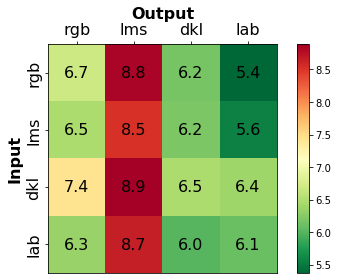

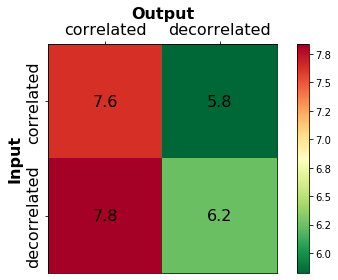

In [5]:
out_dir = '../figures/'
db_name = 'coco'
evaluation = 'deltae2000'

model = 'k008_d008'
confusion_matrix_4 = np.array([
    [deltaes[model]['rgb2rgb'], deltaes[model]['rgb2lms'], 
     deltaes[model]['rgb2dkl'], deltaes[model]['rgb2lab']],
    [deltaes[model]['lms2rgb'], deltaes[model]['lms2lms'], 
     deltaes[model]['lms2dkl'], deltaes[model]['lms2lab']], 
    [deltaes[model]['dkl2rgb'], deltaes[model]['dkl2lms'], 
     deltaes[model]['dkl2dkl'], deltaes[model]['dkl2lab']], 
    [deltaes[model]['lab2rgb'], deltaes[model]['lab2lms'], 
     deltaes[model]['lab2dkl'], deltaes[model]['lab2lab']], 
])

corr = ['rgb', 'lms']
deco = ['dkl', 'lab']

display_labels = ['rgb', 'lms', 'dkl', 'lab']
disp = plot_conf_mat(confusion_matrix_4, display_labels, cmap='RdYlGn_r')
disp.figure_.savefig('%s/%s_%s_%s_confmat4.png' % (out_dir, db_name, model, evaluation))

confusion_matrix_2 = np.zeros((2, 2))
for i in range(confusion_matrix_4.shape[0]):
    if i < 2:
        indi = 0
    else:
        indi = 1
    for j in range(confusion_matrix_4.shape[1]):
        if j < 2:
            indj = 0
        else:
            indj = 1
        confusion_matrix_2[indi, indj] += confusion_matrix_4[i, j]

confusion_matrix_2 /= 4

display_labels = ['correlated', 'decorrelated']
disp = plot_conf_mat(confusion_matrix_2, display_labels, cmap='RdYlGn_r')
disp.figure_.savefig('%s/%s_%s_%s_confmat2.png' % (out_dir, db_name, model, evaluation))

## K=8 and D=128

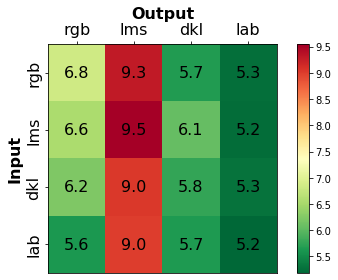

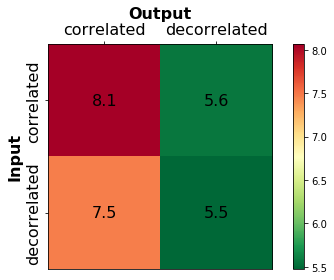

In [6]:
out_dir = '../figures/'
db_name = 'coco'
evaluation = 'deltae2000'

model = 'k008_d128'
confusion_matrix_4 = np.array([
    [deltaes[model]['rgb2rgb'], deltaes[model]['rgb2lms'], 
     deltaes[model]['rgb2dkl'], deltaes[model]['rgb2lab']],
    [deltaes[model]['lms2rgb'], deltaes[model]['lms2lms'], 
     deltaes[model]['lms2dkl'], deltaes[model]['lms2lab']], 
    [deltaes[model]['dkl2rgb'], deltaes[model]['dkl2lms'], 
     deltaes[model]['dkl2dkl'], deltaes[model]['dkl2lab']], 
    [deltaes[model]['lab2rgb'], deltaes[model]['lab2lms'], 
     deltaes[model]['lab2dkl'], deltaes[model]['lab2lab']], 
])

corr = ['rgb', 'lms']
deco = ['dkl', 'lab']

display_labels = ['rgb', 'lms', 'dkl', 'lab']
disp = plot_conf_mat(confusion_matrix_4, display_labels, cmap='RdYlGn_r')
disp.figure_.savefig('%s/%s_%s_%s_confmat4.png' % (out_dir, db_name, model, evaluation))

confusion_matrix_2 = np.zeros((2, 2))
for i in range(confusion_matrix_4.shape[0]):
    if i < 2:
        indi = 0
    else:
        indi = 1
    for j in range(confusion_matrix_4.shape[1]):
        if j < 2:
            indj = 0
        else:
            indj = 1
        confusion_matrix_2[indi, indj] += confusion_matrix_4[i, j]

confusion_matrix_2 /= 4

display_labels = ['correlated', 'decorrelated']
disp = plot_conf_mat(confusion_matrix_2, display_labels, cmap='RdYlGn_r')
disp.figure_.savefig('%s/%s_%s_%s_confmat2.png' % (out_dir, db_name, model, evaluation))

## Plotting DeltaE for various sizes of embedding space

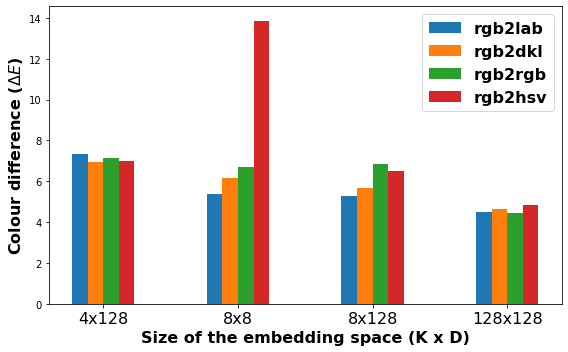

In [7]:
out_dir = '../figures/'
db_name = 'coco'
evaluation = 'deltae2000'

ind = np.arange(4)  # the x locations for the groups
width = 0.35 * 0.66  # the width of the bars

colour_spaces = ['dkl', 'hsv', 'lab', 'rgb']
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
rgb2lab = [deltaes['k004_d128']['rgb2lab'], deltaes['k008_d008']['rgb2lab'], 
           deltaes['k008_d128']['rgb2lab'], deltaes['k128_d128']['rgb2lab']]
rgb2dkl = [deltaes['k004_d128']['rgb2dkl'], deltaes['k008_d008']['rgb2dkl'], 
           deltaes['k008_d128']['rgb2dkl'], deltaes['k128_d128']['rgb2dkl']]
rgb2rgb = [deltaes['k004_d128']['rgb2rgb'], deltaes['k008_d008']['rgb2rgb'], 
           deltaes['k008_d128']['rgb2rgb'], deltaes['k128_d128']['rgb2rgb']]
rgb2hsv = [deltaes['k004_d128']['rgb2hsv'], deltaes['k008_d008']['rgb2hsv'], 
           deltaes['k008_d128']['rgb2hsv'], deltaes['k128_d128']['rgb2hsv']]
rects1 = ax.bar(ind-3*(width/4), rgb2lab, width/2,)
rects2 = ax.bar(ind-(width/4), rgb2dkl, width/2,)
rects3 = ax.bar(ind+(width/4), rgb2rgb, width/2,)
rects4 = ax.bar(ind+3*(width/4), rgb2hsv, width/2,)
legends = ['rgb2lab', 'rgb2dkl', 'rgb2rgb', 'rgb2hsv']
ax.legend(legends, prop={'weight': 'bold', 'size': 16})


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Colour difference ($\Delta E$)', fontsize=16, fontweight='bold')
ax.set_xticks(ind)
vis_legends = ['4x128', '8x8', '8x128', '128x128']
ax.set_xticklabels(vis_legends, fontsize=16)
ax.set_xlabel('Size of the embedding space (K x D)', fontsize=16, fontweight='bold')


fig.tight_layout()
fig.savefig('%s/%s_%s_four_embeddings.png' % (out_dir, db_name, evaluation))
plt.show()

# Reading the IoUs

In [8]:
accuracies = dict()
for mname in models:
    accuracies[mname] = dict()
    current_dir = '%s/accuracy/%s/*/' % (results_dir, mname)
    all_path = sorted(glob.glob(current_dir))
    for path in all_path:
        colour_space = path.split('/')[-2]
        current_path = '%s/sem_seg_evaluation.pth' % (path)
        if colour_space in examined_colour_space:
            current_result = torch.load(current_path, map_location='cpu')
            accuracies[mname][colour_space] = current_result['fwIoU']

## Plotting the segmentation IoUs

### K=8 and D=8

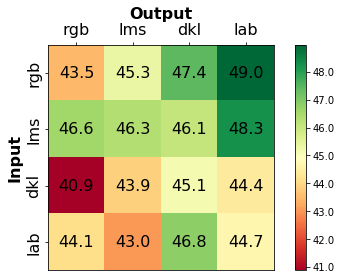

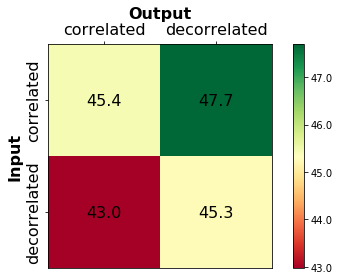

In [9]:
out_dir = '../figures/'
db_name = 'coco'
evaluation = 'IoU'

model = 'k008_d008'
confusion_matrix_4 = np.array([
    [accuracies[model]['rgb2rgb'], accuracies[model]['rgb2lms'], 
     accuracies[model]['rgb2dkl'], accuracies[model]['rgb2lab']],
    [accuracies[model]['lms2rgb'], accuracies[model]['lms2lms'], 
     accuracies[model]['lms2dkl'], accuracies[model]['lms2lab']], 
    [accuracies[model]['dkl2rgb'], accuracies[model]['dkl2lms'], 
     accuracies[model]['dkl2dkl'], accuracies[model]['dkl2lab']], 
    [accuracies[model]['lab2rgb'], accuracies[model]['lab2lms'], 
     accuracies[model]['lab2dkl'], accuracies[model]['lab2lab']], 
])

corr = ['rgb', 'lms']
deco = ['dkl', 'lab']

display_labels = ['rgb', 'lms', 'dkl', 'lab']
disp = plot_conf_mat(confusion_matrix_4, display_labels, cmap='RdYlGn')
disp.figure_.savefig('%s/%s_%s_%s_confmat4.png' % (out_dir, db_name, model, evaluation))

confusion_matrix_2 = np.zeros((2, 2))
for i in range(confusion_matrix_4.shape[0]):
    if i < 2:
        indi = 0
    else:
        indi = 1
    for j in range(confusion_matrix_4.shape[1]):
        if j < 2:
            indj = 0
        else:
            indj = 1
        confusion_matrix_2[indi, indj] += confusion_matrix_4[i, j]

confusion_matrix_2 /= 4

display_labels = ['correlated', 'decorrelated']
disp = plot_conf_mat(confusion_matrix_2, display_labels, cmap='RdYlGn')
disp.figure_.savefig('%s/%s_%s_%s_confmat2.png' % (out_dir, db_name, model, evaluation))

### K=8 and D=128

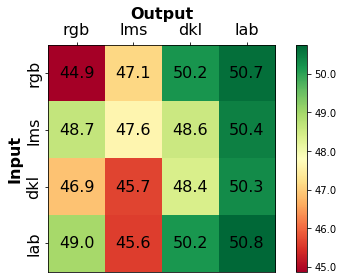

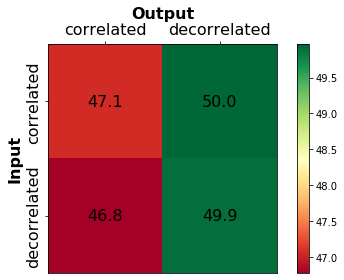

In [10]:
out_dir = '../figures/'
db_name = 'coco'
evaluation = 'IoU'

model = 'k008_d128'
confusion_matrix_4 = np.array([
    [accuracies[model]['rgb2rgb'], accuracies[model]['rgb2lms'], 
     accuracies[model]['rgb2dkl'], accuracies[model]['rgb2lab']],
    [accuracies[model]['lms2rgb'], accuracies[model]['lms2lms'], 
     accuracies[model]['lms2dkl'], accuracies[model]['lms2lab']], 
    [accuracies[model]['dkl2rgb'], accuracies[model]['dkl2lms'], 
     accuracies[model]['dkl2dkl'], accuracies[model]['dkl2lab']], 
    [accuracies[model]['lab2rgb'], accuracies[model]['lab2lms'], 
     accuracies[model]['lab2dkl'], accuracies[model]['lab2lab']], 
])

corr = ['rgb', 'lms']
deco = ['dkl', 'lab']

display_labels = ['rgb', 'lms', 'dkl', 'lab']
disp = plot_conf_mat(confusion_matrix_4, display_labels, cmap='RdYlGn')
disp.figure_.savefig('%s/%s_%s_%s_confmat4.png' % (out_dir, db_name, model, evaluation))

confusion_matrix_2 = np.zeros((2, 2))
for i in range(confusion_matrix_4.shape[0]):
    if i < 2:
        indi = 0
    else:
        indi = 1
    for j in range(confusion_matrix_4.shape[1]):
        if j < 2:
            indj = 0
        else:
            indj = 1
        confusion_matrix_2[indi, indj] += confusion_matrix_4[i, j]

confusion_matrix_2 /= 4

display_labels = ['correlated', 'decorrelated']
disp = plot_conf_mat(confusion_matrix_2, display_labels, cmap='RdYlGn')
disp.figure_.savefig('%s/%s_%s_%s_confmat2.png' % (out_dir, db_name, model, evaluation))

### Averagefor both K=8s

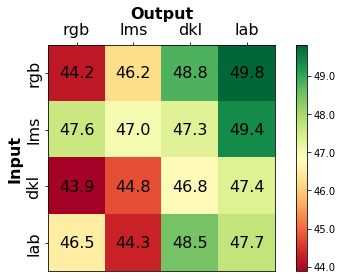

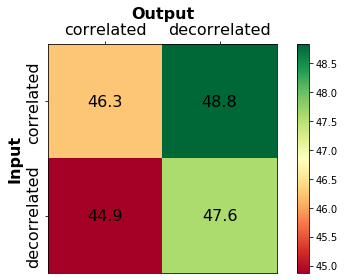

In [11]:
out_dir = '../figures/'
db_name = 'coco'
evaluation = 'IoU'

model = 'k008_d008'
confusion_matrix_4a = np.array([
    [accuracies[model]['rgb2rgb'], accuracies[model]['rgb2lms'], 
     accuracies[model]['rgb2dkl'], accuracies[model]['rgb2lab']],
    [accuracies[model]['lms2rgb'], accuracies[model]['lms2lms'], 
     accuracies[model]['lms2dkl'], accuracies[model]['lms2lab']], 
    [accuracies[model]['dkl2rgb'], accuracies[model]['dkl2lms'], 
     accuracies[model]['dkl2dkl'], accuracies[model]['dkl2lab']], 
    [accuracies[model]['lab2rgb'], accuracies[model]['lab2lms'], 
     accuracies[model]['lab2dkl'], accuracies[model]['lab2lab']], 
])
model = 'k008_d128'
confusion_matrix_4b = np.array([
    [accuracies[model]['rgb2rgb'], accuracies[model]['rgb2lms'], 
     accuracies[model]['rgb2dkl'], accuracies[model]['rgb2lab']],
    [accuracies[model]['lms2rgb'], accuracies[model]['lms2lms'], 
     accuracies[model]['lms2dkl'], accuracies[model]['lms2lab']], 
    [accuracies[model]['dkl2rgb'], accuracies[model]['dkl2lms'], 
     accuracies[model]['dkl2dkl'], accuracies[model]['dkl2lab']], 
    [accuracies[model]['lab2rgb'], accuracies[model]['lab2lms'], 
     accuracies[model]['lab2dkl'], accuracies[model]['lab2lab']], 
])

model = 'k008_dXXX'
confusion_matrix_4 = (confusion_matrix_4a + confusion_matrix_4b) / 2

corr = ['rgb', 'lms']
deco = ['dkl', 'lab']

display_labels = ['rgb', 'lms', 'dkl', 'lab']
disp = plot_conf_mat(confusion_matrix_4, display_labels, cmap='RdYlGn')
disp.figure_.savefig('%s/%s_%s_%s_confmat4.png' % (out_dir, db_name, model, evaluation))

confusion_matrix_2 = np.zeros((2, 2))
for i in range(confusion_matrix_4.shape[0]):
    if i < 2:
        indi = 0
    else:
        indi = 1
    for j in range(confusion_matrix_4.shape[1]):
        if j < 2:
            indj = 0
        else:
            indj = 1
        confusion_matrix_2[indi, indj] += confusion_matrix_4[i, j]

confusion_matrix_2 /= 4

display_labels = ['correlated', 'decorrelated']
disp = plot_conf_mat(confusion_matrix_2, display_labels, cmap='RdYlGn')
disp.figure_.savefig('%s/%s_%s_%s_confmat2.png' % (out_dir, db_name, model, evaluation))

## Plotting IoUs for various sizes of embedding space

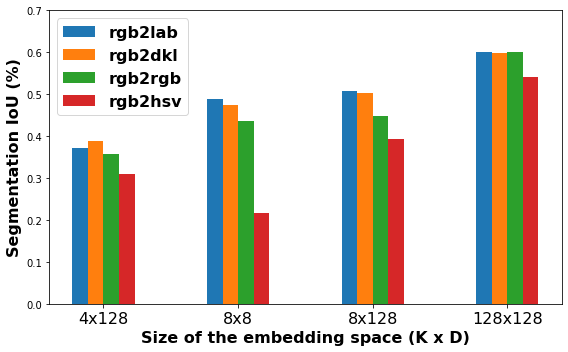

In [12]:
out_dir = '../figures/'
db_name = 'coco'
evaluation = 'IoU'


ind = np.arange(4)  # the x locations for the groups
width = 0.35 * 0.66  # the width of the bars

colour_spaces = ['dkl', 'hsv', 'lab', 'rgb']
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
rgb2lab = [accuracies['k004_d128']['rgb2lab'] / 100, accuracies['k008_d008']['rgb2lab'] / 100, 
           accuracies['k008_d128']['rgb2lab'] / 100, accuracies['k128_d128']['rgb2lab'] / 100]
rgb2dkl = [accuracies['k004_d128']['rgb2dkl'] / 100, accuracies['k008_d008']['rgb2dkl'] / 100, 
           accuracies['k008_d128']['rgb2dkl'] / 100, accuracies['k128_d128']['rgb2dkl'] / 100]
rgb2rgb = [accuracies['k004_d128']['rgb2rgb'] / 100, accuracies['k008_d008']['rgb2rgb'] / 100, 
           accuracies['k008_d128']['rgb2rgb'] / 100, accuracies['k128_d128']['rgb2rgb'] / 100]
rgb2hsv = [accuracies['k004_d128']['rgb2hsv'] / 100, accuracies['k008_d008']['rgb2hsv'] / 100, 
           accuracies['k008_d128']['rgb2hsv'] / 100, accuracies['k128_d128']['rgb2hsv'] / 100]
rects1 = ax.bar(ind-3*(width/4), rgb2lab, width/2,)
rects2 = ax.bar(ind-(width/4), rgb2dkl, width/2,)
rects3 = ax.bar(ind+(width/4), rgb2rgb, width/2,)
rects4 = ax.bar(ind+3*(width/4), rgb2hsv, width/2,)
legends = ['rgb2lab', 'rgb2dkl', 'rgb2rgb', 'rgb2hsv']
ax.legend(legends, prop={'weight': 'bold', 'size': 16})


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Segmentation IoU (%)', fontsize=16, fontweight='bold')
ax.set_xticks(ind)
vis_legends = ['4x128', '8x8', '8x128', '128x128']
ax.set_xticklabels(vis_legends, fontsize=16)
ax.set_xlabel('Size of the embedding space (K x D)', fontsize=16, fontweight='bold')

ax.set_ylim([0, 0.7])

fig.tight_layout()
fig.savefig('%s/%s_%s_four_embeddings.png' % (out_dir, db_name, evaluation))
plt.show()

# Reading the latent histograms

In [13]:
img_inds = dict()

for mname in models:
    img_inds[mname] = dict()
    for colour_space in examined_colour_space:
        current_path = '%s/hist_embeddeds/%s/%s.txt' % (results_dir, mname, colour_space)
        if os.path.exists(current_path):
            img_inds[mname][colour_space] = np.loadtxt(current_path)
        else:
            img_inds[mname][colour_space] = []

# Reading segmentation score per image

In [14]:
seg_score = dict()
for mname in models:
    seg_score[mname] = dict()
    current_dir = '%s/accuracy/%s/*/' % (results_dir, mname)
    all_path = sorted(glob.glob(current_dir))
    for path in all_path:
        colour_space = path.split('/')[-2]
        current_path = '%s/predictions.json' % (path)
        if colour_space in examined_colour_space:
            with open(current_path) as json_file:
                current_result = json.load(json_file)
            current_accuracy = []
            for tmp_accs in current_result['annotations']:
                cat_id_scores = []
                for seg_info in tmp_accs['segments_info']:
                    if 'score' in seg_info:
                        cat_id_scores.append(seg_info['score'])
                if len(cat_id_scores) == 0:
                    current_accuracy.append([0, 0])
                else:
                    current_accuracy.append([np.mean(cat_id_scores), np.median(cat_id_scores)])
            seg_score[mname][colour_space] = current_accuracy

# Computing the STD in frequenty of used vectors

In [15]:
hists_info = dict()
for mname in models:
    hists_info[mname] = dict()
    for colour_space in examined_colour_space:
        if len(img_inds[mname][colour_space]) != 0:
            hists_info[mname][colour_space] = img_inds[mname][colour_space].std()

# Plotting error-rate versus STD in frequency

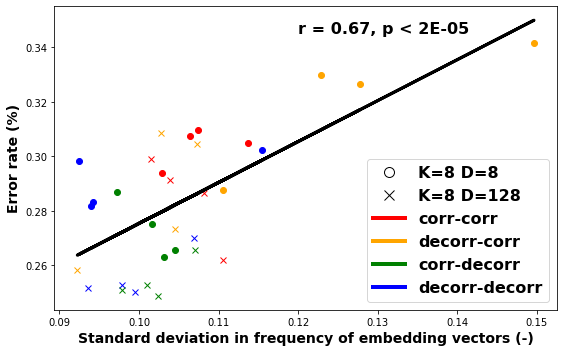

In [16]:
corr = ['rgb', 'lms']
deco = ['dkl', 'lab']

all_accs = []
all_hists = []
colours_plot = []
symbols_plot = []
for mname in models:
    if mname == 'k004_d128':
        continue
    for key, val in hists_info[mname].items():
        if 'hsv' in key:
            continue

        all_hists.append(np.mean(val))
        all_accs.append(1 - np.mean(seg_score[mname][key], axis=0)[0])

        inc = key[-7:-4]
        ouc = key[-3:]
        if inc in corr and ouc in corr:
            colours_plot.append('red')
        elif inc in corr and ouc in deco:
            colours_plot.append('green')
        elif inc in deco and ouc in corr:
            colours_plot.append('orange')
        elif inc in deco and ouc in deco:
            colours_plot.append('blue')

        if mname == 'k008_d008':
            symbols_plot.append('o')
        elif mname == 'k004_d128':
            symbols_plot.append('s')
        else:
            symbols_plot.append('x')

out_dir = '../figures/'
db_name = 'coco'
evaluation = 'err-hist'
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1, 1, 1)
for_legends = []
for i in range(len(all_accs)):
    cl = ax.plot(all_hists[i], all_accs[i], symbols_plot[i], color=colours_plot[i])
    for_legends.append(cl)
rval, pval = pearsonr(all_hists, all_accs)


regr = linear_model.LinearRegression()

X = np.expand_dims(np.array(all_hists), axis=1)

# regression line
regr.fit(X, all_accs)
diabetes_y_pred = regr.predict(X)
plt.plot(all_hists, diabetes_y_pred, color='black', linewidth=3)
ax.text(0.12, 0.345, 'r = %.2f, p < %.0E' % (rval, pval), fontsize=16, fontweight='bold')
ax.set_xlabel('Standard deviation in frequency of embedding vectors (-)', fontsize=14, fontweight='bold')
ax.set_ylabel('Error rate (%)', fontsize=14, fontweight='bold')

legend_elements = [
    Line2D([0], [0], marker='o', color='w', markeredgecolor='black', label='K=8 D=8', markersize=10),
    Line2D([0], [0], marker='x', color='w', markeredgecolor='black', label='K=8 D=128', markersize=10),
    Line2D([0], [0], color='red', lw=4, label='corr-corr'),
    Line2D([0], [0], color='orange', lw=4, label='decorr-corr'),
    Line2D([0], [0], color='g', lw=4, label='corr-decorr'),
    Line2D([0], [0], color='b', lw=4, label='decorr-decorr'),
]

ax.legend(handles=legend_elements, loc='lower right', prop={'size':16, 'weight':'bold'})


fig.tight_layout()
fig.savefig('%s/%s_%s.png' % (out_dir, db_name, evaluation))